In [2]:
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
   ---------------------------------------- 0.0/11.3 MB ? eta -:--:--
   --------------------------- ------------ 7.9/11.3 MB 48.7 MB/s eta 0:00:01
   ---------------------------------------- 11.3/11.3 MB 50.6 MB/s  0:00:00

   ---------------------------------------- 0/3 [pytz]
   ------------- -------------------------- 1/3 [tzdata]
   ------------- -------------------------- 1/3 [tzdata]
   -------------------------- ------------- 2/3 [pandas]
   -------------------------- ------------- 2/3 [pandas]
   -------------------------- ------------- 2/3 [pandas]
   -------------------------- ------------- 2/3 [pandas]
   -------------------------- ------------- 2/3 [pandas]
   -------------------------- ------------- 2/3 [pandas]
   -------------------------- ------------- 2/3 [pandas]
   -------------------------- ------------- 2/3 [pandas]
   -------------------------- ------------- 2/3 [pandas]
   -----------------

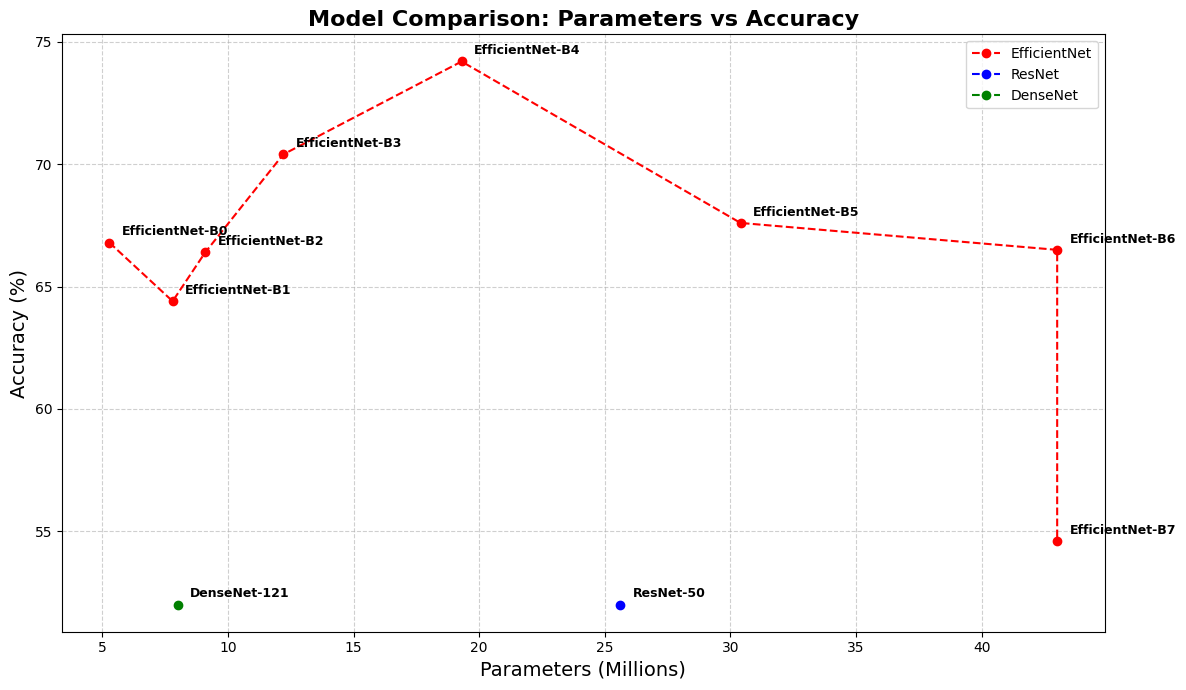

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

# -----------------------------
# Step 1: Prepare the dataset
# -----------------------------
data = {
    "Model": [
        "EfficientNet-B0", "EfficientNet-B1", "EfficientNet-B2", "EfficientNet-B3",
        "EfficientNet-B4", "EfficientNet-B5", "EfficientNet-B6", "EfficientNet-B7",
        "ResNet-50", "DenseNet-121"
    ],
    "Parameters_M": [5.28, 7.8, 9.1, 12.2, 19.3, 30.4, 43.0, 43.0, 25.6, 8.0],
    "Accuracy_%": [66.8, 64.4, 66.4, 70.4, 74.2, 67.6, 66.5, 54.6, 52.0, 52.0],
    "Family": [
        "EfficientNet", "EfficientNet", "EfficientNet", "EfficientNet",
        "EfficientNet", "EfficientNet", "EfficientNet", "EfficientNet",
        "ResNet", "DenseNet"
    ]
}

df = pd.DataFrame(data)

# -----------------------------
# Step 2: Plot grouped families
# -----------------------------
plt.figure(figsize=(12, 7))

families = df["Family"].unique()
colors = {"EfficientNet": "red", "ResNet": "blue", "DenseNet": "green"}

for fam in families:
    fam_df = df[df["Family"] == fam]
    plt.plot(fam_df["Parameters_M"], fam_df["Accuracy_%"], 
             marker="o", linestyle="--", color=colors[fam], label=fam)
    for i in range(len(fam_df)):
        plt.text(fam_df["Parameters_M"].iloc[i] + 0.5, 
                 fam_df["Accuracy_%"].iloc[i] + 0.3, 
                 fam_df["Model"].iloc[i], fontsize=9, weight="bold")

# Labels and title
plt.title("Model Comparison: Parameters vs Accuracy", fontsize=16, weight="bold")
plt.xlabel("Parameters (Millions)", fontsize=14)
plt.ylabel("Accuracy (%)", fontsize=14)

plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


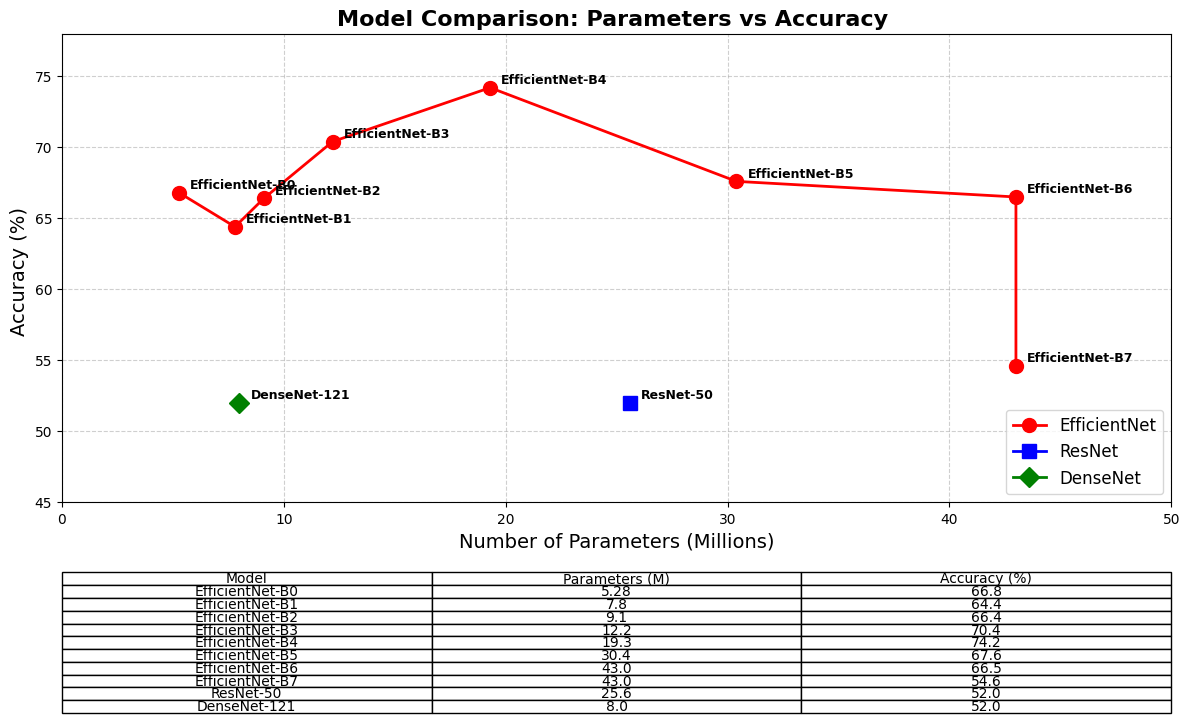

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

# -----------------------------
# Step 1: Prepare the dataset
# -----------------------------
data = {
    "Model": [
        "EfficientNet-B0", "EfficientNet-B1", "EfficientNet-B2", "EfficientNet-B3",
        "EfficientNet-B4", "EfficientNet-B5", "EfficientNet-B6", "EfficientNet-B7",
        "ResNet-50", "DenseNet-121"
    ],
    "Parameters_M": [5.28, 7.8, 9.1, 12.2, 19.3, 30.4, 43.0, 43.0, 25.6, 8.0],
    "Accuracy_%": [66.8, 64.4, 66.4, 70.4, 74.2, 67.6, 66.5, 54.6, 52.0, 52.0],
    "Family": [
        "EfficientNet", "EfficientNet", "EfficientNet", "EfficientNet",
        "EfficientNet", "EfficientNet", "EfficientNet", "EfficientNet",
        "ResNet", "DenseNet"
    ]
}

df = pd.DataFrame(data)

# -----------------------------
# Step 2: Plot grouped families
# -----------------------------
plt.figure(figsize=(12, 8))

colors = {"EfficientNet": "red", "ResNet": "blue", "DenseNet": "green"}
markers = {"EfficientNet": "o", "ResNet": "s", "DenseNet": "D"}

for fam in df["Family"].unique():
    fam_df = df[df["Family"] == fam].sort_values("Parameters_M")
    plt.plot(fam_df["Parameters_M"], fam_df["Accuracy_%"],
             marker=markers[fam], markersize=10, linewidth=2,
             color=colors[fam], label=fam)
    # Annotate each point
    for i, row in fam_df.iterrows():
        plt.text(row["Parameters_M"]+0.5, row["Accuracy_%"]+0.3,
                 row["Model"], fontsize=9, weight="bold")

# -----------------------------
# Step 3: Labels, grid, legend
# -----------------------------
plt.title("Model Comparison: Parameters vs Accuracy ",
          fontsize=16, weight="bold")
plt.xlabel("Number of Parameters (Millions)", fontsize=14)
plt.ylabel("Accuracy (%) ", fontsize=14)

plt.grid(True, linestyle="--", alpha=0.6)
plt.legend(fontsize=12, loc="lower right")
plt.ylim(45, 78)   # adjust range for neatness
plt.xlim(0, 50)    # adjust to fit your models

# -----------------------------
# Step 4: Add table inset
# -----------------------------
table_data = df[["Model", "Parameters_M", "Accuracy_%"]].values
table = plt.table(cellText=table_data,
                  colLabels=["Model", "Parameters (M)", "Accuracy (%)"],
                  cellLoc="center", loc="bottom",
                  bbox=[0.0, -0.45, 1, 0.3])
table.auto_set_font_size(False)
table.set_fontsize(10)

plt.tight_layout()
plt.show()
